In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("y.png")
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

### Aspect Ratio
It is the ratio of width to height of bounding rect of the object.

In [56]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print(aspect_ratio)

0.90625


### Extent
Extent is the ratio of contour area to bounding rectangle area.

In [57]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print(extent)

0.13870929118773948


###  Solidity
Solidity is the ratio of contour area to its convex hull area.

In [58]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)

0.21726288152280931


### Equivalent Diameter
Equivalent Diameter is the diameter of the circle whose area is same as the contour area.

In [59]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)

76.8127076095


### Orientation
Orientation is the angle at which object is directed. Following method also gives the Major Axis and Minor Axis lengths.

In [60]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
print(angle)

84.064208984375


### Mask and Pixel Points
In some cases, we may need all the points which comprises that object.

In [61]:
mask = np.zeros(imgray.shape, np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)

print(pixelpoints)

[[ 30 205]
 [ 30 206]
 [ 30 207]
 ..., 
 [221 130]
 [221 131]
 [221 132]]


### Maximum Value, Minimum Value and their locations
We can find these parameters using a mask image.

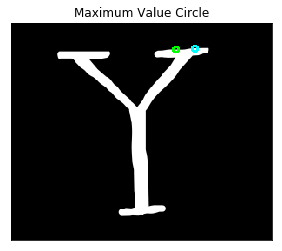

In [62]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)

minimum = cv2.circle(img, min_loc, 3,(0,255,0),2)
maximum = cv2.circle(img, max_loc, 3,(0,255,255),2)
plt.imshow(maximum),plt.title('Maximum Value Circle')
plt.xticks([]), plt.yticks([])

plt.show()

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("y.png")
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

### Mean Color or Mean Intensity
Here, we can find the average color of an object. Or it can be average intensity of the object in grayscale mode. We again use the same mask to do it.

In [64]:
mean_val = cv2.mean(img,mask = mask)
print(mean_val)

(249.70161129898548, 249.70161129898548, 249.70161129898548, 0.0)


### Extreme Points
Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.

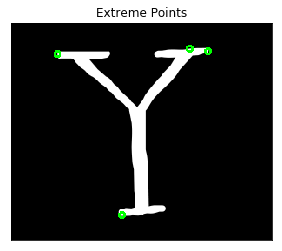

In [65]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.circle(img, leftmost, 3,(0,255,0),2)
cv2.circle(img, rightmost, 3,(0,255,0),2)
cv2.circle(img, topmost, 3,(0,255,0),2)
cv2.circle(img, bottommost, 3,(0,255,0),2)
plt.imshow(img),plt.title('Extreme Points')
plt.xticks([]), plt.yticks([])

plt.show()